In [1]:
from RoutePlanner.TemporalCellGrid import TimeCellGrid
import pandas as pd

In [2]:
OptInfo = {}
OptInfo['Bounds Longitude']     = [230,360]
OptInfo['Bounds Latitude']      = [-80,-40]
OptInfo['Grid Spacing (dx,dy)'] = [5,2.5]
OptInfo['Ice Data Path']        = '../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc'
OptInfo['Current Data Path']    = '../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc'

OptInfo['Start Time']           = '2017-05-01'
OptInfo['End Time']             = '2017-06-01'
OptInfo['WayPoints']            = pd.read_csv('../resources/WayPoints.csv') 
OptInfo['MaxIceExtent']         = 0.8
OptInfo['Zero Currents']        = True
OptInfo['VariableSpeed']        = False
OptInfo['Time Unit']            = 'days'
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3
OptInfo['VehicleInfo']['Unit']  = 'km/hr'
OptInfo['Start Waypoints']      = None

In [3]:
TcellGrid = TimeCellGrid(OptInfo)

In [4]:
from glob import glob
import json
import numpy as np

PATH = '/Users/jsmith/Documents/Research/Researcher_BAS/RoutePlanning/SDADT-Positions'

pts = []
tms = []
for file in glob('{}/*.json'.format(PATH)):
    try :
        data = json.load(open(file))
        for pt in data['features']:
            pts.append(pt['geometry']['coordinates'])
            tms.append(pt['properties']['timestamp'])
    except:
        continue
tms = pd.to_datetime(tms)
pts = np.array(pts)

Path = pd.DataFrame({'Time':tms,'Long':pts[:,0]+360,'Lat':pts[:,1]})
Path = Path[(Path['Long'] != 0) & (Path['Lat'] != 0)]
Path = Path.sort_values('Time').reset_index(drop=True)

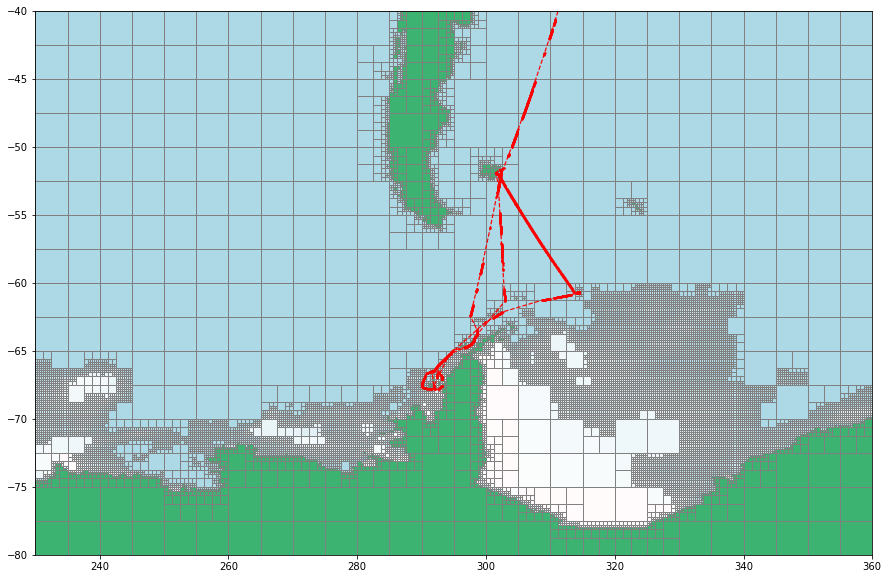

In [7]:
import matplotlib.pylab as plt
cellGrid = TcellGrid.range('2017-01-01','2017-02-08')
cellGrid.recursiveSplit(4)
ax = cellGrid.plot(return_ax=True)
ax.plot(Path['Long'],Path['Lat'],marker='o',markersize=1,linewidth=1.2,linestyle='--',color='r')

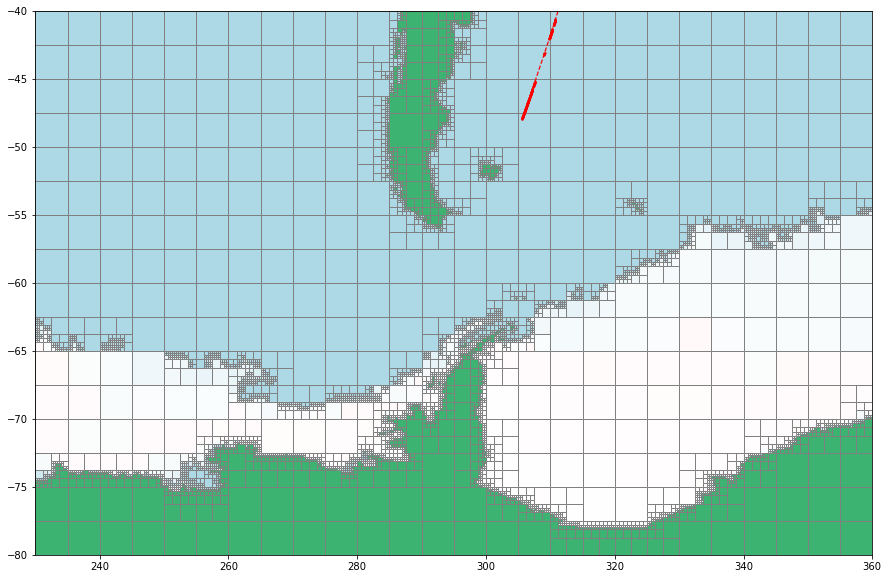

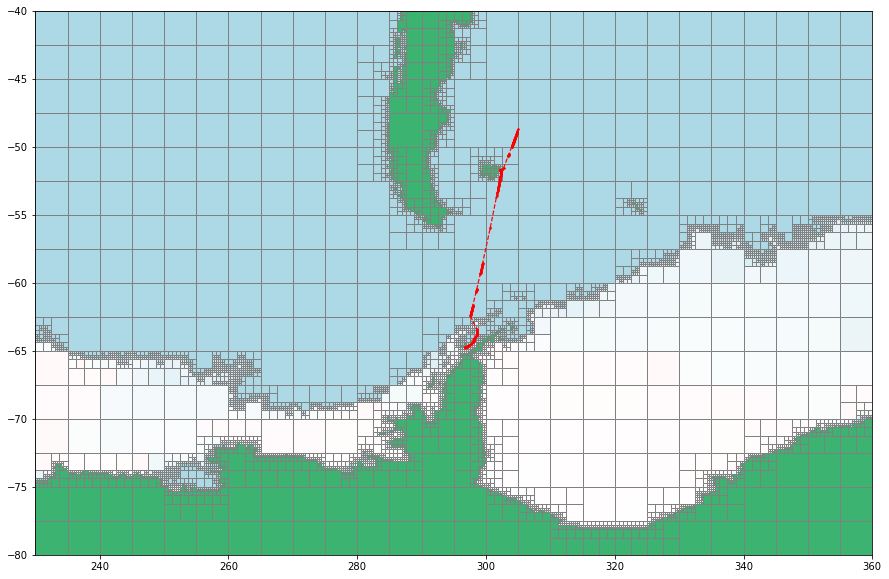

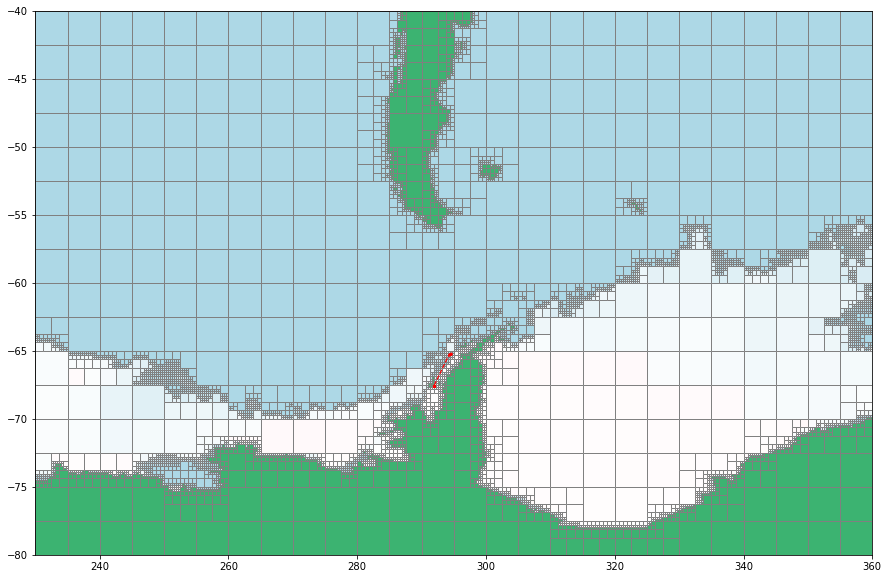

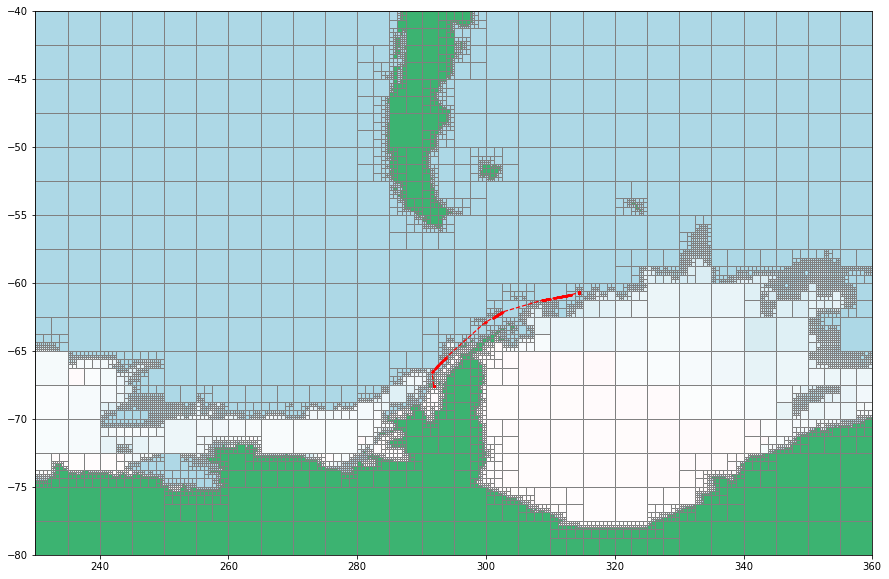

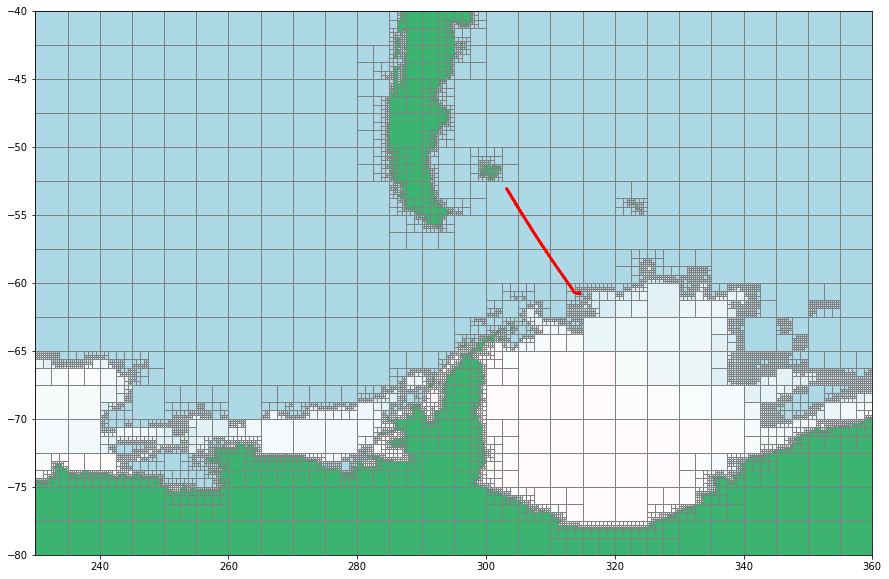

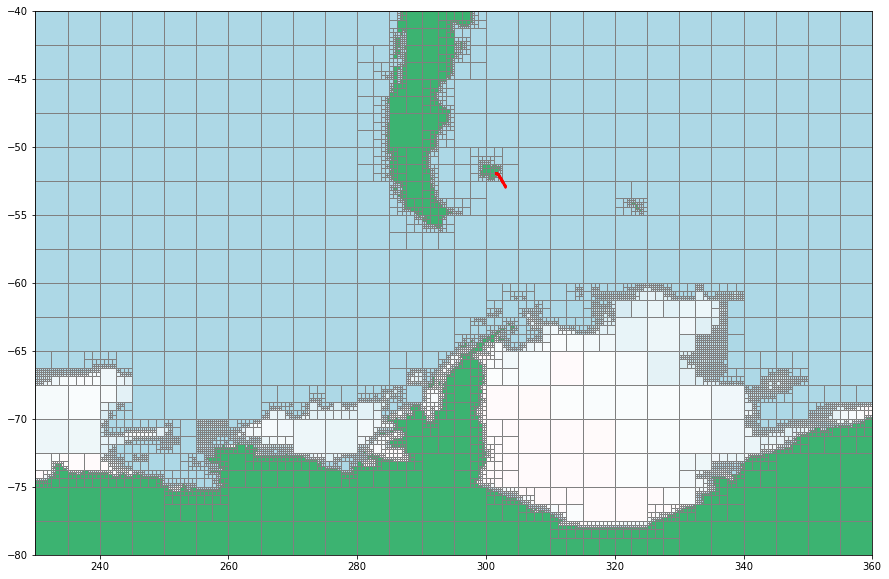

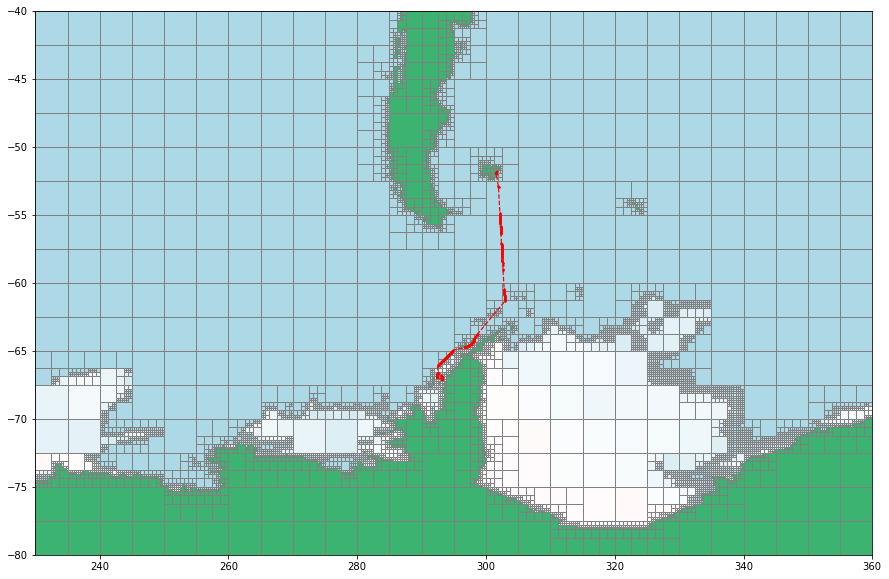

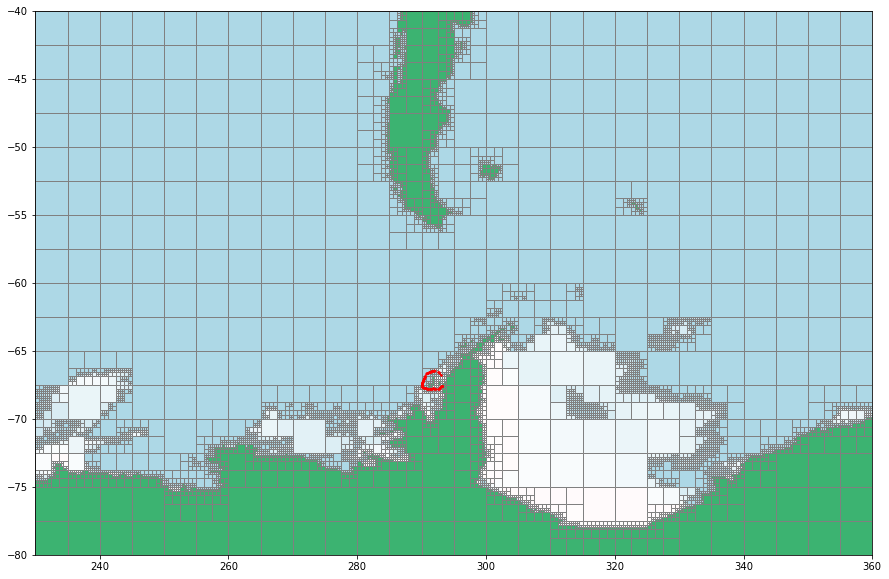

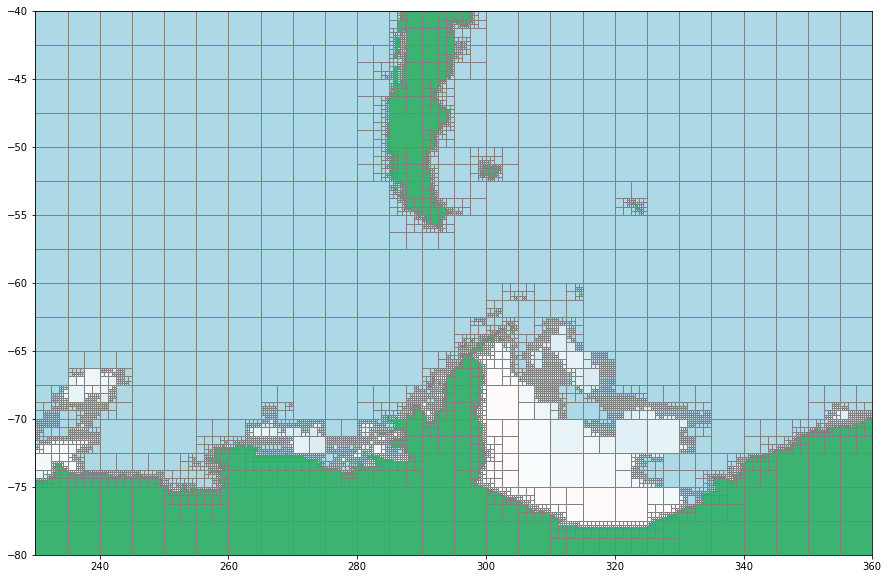

In [6]:
dts  = pd.date_range(start='2021-12-01',end='2022-02-08',freq='7D')
dtsi = pd.date_range(start='2016-12-01',end='2017-02-08',freq='7D')

for id in range(len(dts)-1):
    cellGrid = TcellGrid.range(str(dtsi[id]),str(dtsi[id+1]))
    cellGrid.recursiveSplit(4)
    
    subPath = Path[(Path['Time']>=str(dts[id])) & (Path['Time']<=str(dts[id+1]))]
    ax = cellGrid.plot(return_ax=True)
    ax.plot(subPath['Long'],subPath['Lat'],marker='o',markersize=1,linewidth=1.2,linestyle='--',color='r')
    plt.savefig('{}/Path_{}.png'.format(PATH,id))